# Wine Fraud Detection

## Fraud in Wine

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.


## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

In [2]:
df = pd.read_csv("wine_fraud.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [ ]:
# "quality" is our Target.

In [4]:
df.shape

(6497, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [7]:
df["quality"].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

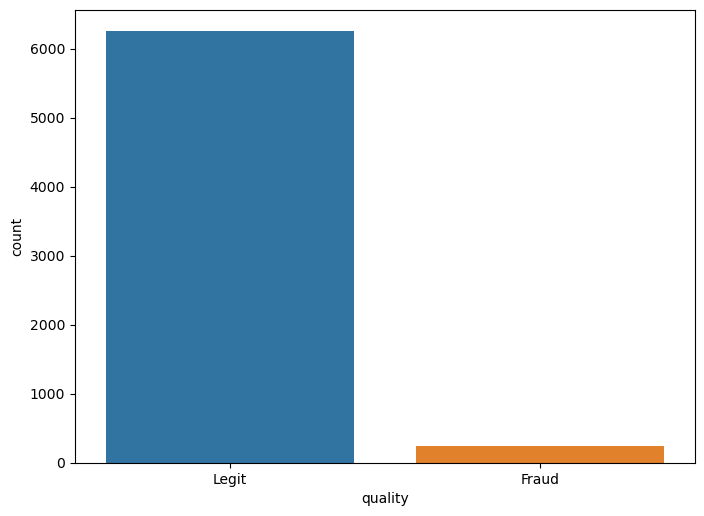

In [8]:
plt.figure(figsize= (8,6), dpi= 100)

sns.countplot(data= df, x= "quality")

plt.show()

In [ ]:
# We have a Highly Imbalanced Dataset.

In [9]:
df["type"].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [11]:
# Chnaging Target Column in Numeric Data so that we can see Correlation of target with Features.

df["quality"] = df["quality"].map({"Legit" : 0, "Fraud" : 1})

In [12]:
df["quality"].value_counts()

0    6251
1     246
Name: quality, dtype: int64

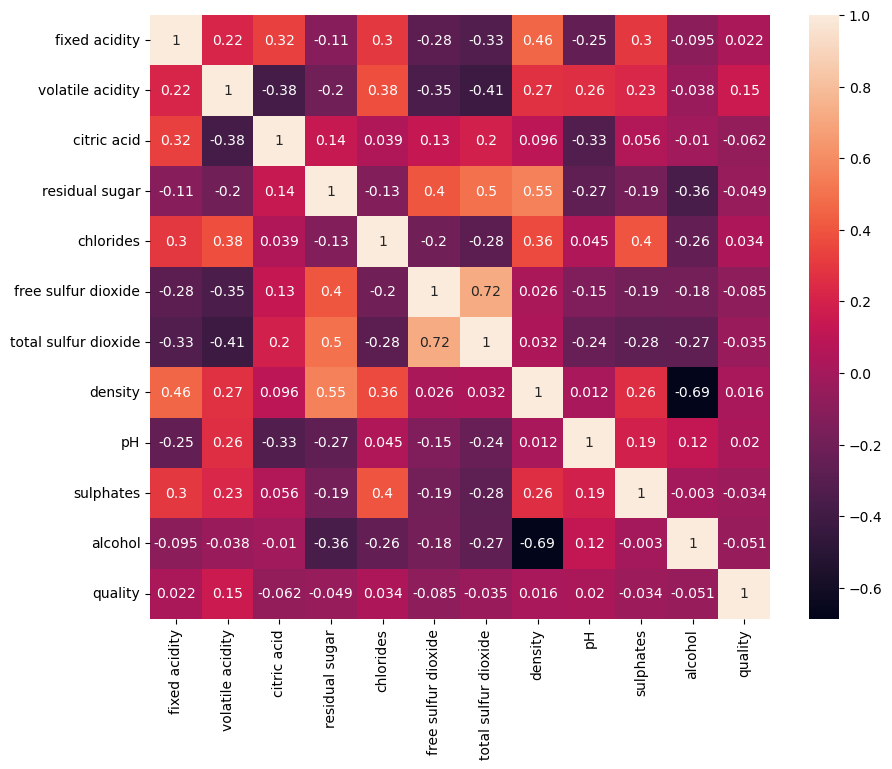

In [14]:
# Correlation Between Features and Target:

plt.figure(figsize= (10,8), dpi= 100)

sns.heatmap(data= df.corr(), annot= True)

plt.show()

In [15]:
# No High Positive or Negative Correlation for Target to Any Feature.

### Dummies for Categorical Variable:

In [17]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,red


In [21]:
df = pd.get_dummies(data= df, drop_first= True)

In [22]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0


### Train Test Split:

In [23]:
# Features:

x = df.drop("quality", axis= 1)

In [24]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [25]:
# Target:

y = df["quality"]

In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 12)
(1300, 12)
(5197,)
(1300,)


### Scalling:

In [30]:
sc = StandardScaler()

In [31]:
temp = sc.fit_transform(x_train)
x_train = pd.DataFrame(temp, columns= x_train.columns)
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white
0,-0.468229,-0.599512,0.205467,0.464612,-0.712801,0.311659,0.343566,-0.296146,-0.168884,-1.083266,0.013766,0.565129
1,0.851500,-0.352849,1.104063,-0.702999,1.067470,-1.408735,-1.847518,-0.203072,0.269679,0.598577,1.608717,-1.769509
2,0.385713,2.329612,-2.144710,-0.702999,0.234762,0.024927,-1.295294,-0.326062,1.209455,0.262208,1.105048,-1.769509
3,-1.555065,0.202143,0.067221,-0.890650,-0.798944,-1.007309,-0.618374,-1.492810,0.958848,-1.015992,1.021103,0.565129
4,-0.468229,-0.476180,1.657046,2.070076,-0.081092,0.082273,0.450448,1.133204,-0.670098,-0.275981,-0.993572,0.565129


In [32]:
temp = sc.transform(x_test)
x_test = pd.DataFrame(temp, columns= x_test.columns)
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white
0,-0.157705,-1.031172,2.901257,1.527971,-0.310805,-0.376498,0.183242,-0.163183,0.269679,-1.015992,1.440827,0.565129
1,0.385713,1.867119,-0.762253,-0.682148,0.608045,0.082273,0.307938,0.302187,0.332330,-0.545076,-0.489903,-1.769509
2,-0.312967,0.325475,0.136344,0.402061,-1.028656,0.426352,0.307938,-0.854589,-0.231535,-0.612350,1.272938,0.565129
3,-0.701122,-0.352849,1.034941,1.194368,-0.454375,1.745321,1.198623,0.408557,-0.607446,-0.141434,-0.825682,0.565129
4,0.152820,0.078812,-0.831376,1.757323,-0.052378,1.860014,2.018053,1.392481,-0.670098,-0.208708,-1.329351,0.565129


### Model Building Using Grid Search CV:

In [33]:
model = SVC(class_weight= "balanced")

# class_weight = "balanced" Automatically adjust weights inversely proportional to class frequencies in the input data.
# this is used when we have imbalanced of classes in data, as we have seen above.

In [34]:
param_dict = {"kernel" : ["linear", "rbf", "poly", "sigmoid"],
             "C" : [0.01, 0,1, 1, 10, 100],
             "degree" : [1,2,3], "gamma" : ["scale", "auto"]}

In [35]:
grid_model = GridSearchCV(estimator= model, param_grid= param_dict, cv= 5)

In [36]:
grid_model.fit(x_train, y_train)

# This will take more than 15 minutes to run as dataset is big.

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Shailya\AppData\Roaming\

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Shailya\AppData\Roaming\

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Shailya\AppData\Roaming\

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.7806393  0.7196561  0.78430369 0.75639798 0.7806393  0.71888669
 0.78430369 0.75947712 0.7806393  0.7196561  0.90937384 0.75639798
 0.7806393  0.71888669 0.90822    0.75947712 0.7806393  0.7196561
 0.92303528 0.75639798 0.7806393  0.71888669 0.92303528 0.75947712
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.77563301 0.8449082  0.77428704 0.55589102 0.77563301 0.84490857
 0.77390205 0.55569853 0.77563301 0.8449082  0.8077756  0.55589102
 0.77563301 0.84490857 0.80758329 0.55569853 0.77563301 0.8449082
 0.86742208 0.55589102 0.77563301 0.84490857 0.86665211 0.55569853
 0.77563301 0.8449082  0.77428704 0

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.01, 0, 1, 1, 10, 100], 'degree': [1, 2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [37]:
grid_model.best_estimator_

SVC(C=100, class_weight='balanced', degree=1, gamma='auto')

In [38]:
grid_model.best_params_

{'C': 100, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [39]:
grid_model.best_score_

0.9301547345820685

### Model Evaluation:

In [40]:
pred = grid_model.predict(x_test)

In [41]:
accuracy_score(y_test,pred)

0.9323076923076923

In [42]:
precision_score(y_test,pred)

0.27586206896551724

In [43]:
recall_score(y_test, pred)

0.4897959183673469

In [45]:
confusion_matrix(y_test,pred)

array([[1188,   63],
       [  25,   24]], dtype=int64)

In [46]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1251
           1       0.28      0.49      0.35        49

    accuracy                           0.93      1300
   macro avg       0.63      0.72      0.66      1300
weighted avg       0.95      0.93      0.94      1300



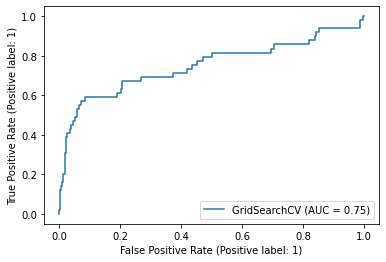

In [47]:
plot_roc_curve(grid_model, x_test, y_test)
plt.show()

In [48]:
# As we have very few data points with Fraud class, the model performs poorly in detecting Frauds.